## Named Entity Recognition 
The chatbot should, depending on the user's intent, identify and label entities, storing them in its dialogue management system to enhance the accuracy of its responses. This notebook is dedicated to extracting entities from each Tweet, which will later be integrated into my processing pipeline.

Specifically, I want to take an utterance as input and produce an output that includes all the entities within that utterance, stored in a dictionary.

In [85]:
%pip install plac


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import sys 
print(sys.executable)

/Library/Frameworks/Python.framework/Versions/3.12/bin/python3


In [8]:
# Itertools 
import itertools
from itertools import chain
import collections 

# Argument parser 
import plac

# Import libraries and set up environment
import pandas as pd
print(f"Pandas: {pd.__version__}")
import numpy as np
print(f"Numpy: {np.__version__}")

# Deep Learning libraries
# Torch 
import torch 
print(f"PyTorch: {torch.__version__}")
import sklearn
print(f"Sklearn: {sklearn.__version__}")

# NER
import spacy
print(f'spaCy: {spacy.__version__}')
from spacy import displacy
import random
from spacy.matcher import PhraseMatcher
import plac
from pathlib import Path

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

# Cool progress bars
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()  # Enable tracking of execution progress

import collections
import yaml
import pickle

# Reading back in intents
with open(r'../objects/intents_repr.yml') as file:
    intents = yaml.load(file, Loader=yaml.FullLoader)

# Reading in representative intents
# with open(r'objects/intents_repr.yml') as file:
#     intents_repr = yaml.load(file, Loader=yaml.FullLoader)

# Cool progress bars
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()  # Enable tracking of execution progress

from IPython.core.display import display, HTML
    
# Reading in training data
train = pd.read_pickle('../objects/train.pkl')

print(train.head())
print(f'\nintents:\n{intents}')

# Reading in processed data
processed = pd.read_pickle('../data/processed/processed_v2.pkl')

Pandas: 2.2.2
Numpy: 1.26.4
PyTorch: 2.3.0
Sklearn: 1.4.2
spaCy: 3.7.4


/var/folders/m0/nhpw880n2pbdfh3k943xczbr0000gn/T/ipykernel_86775/1561719337.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()  # Enable tracking of execution progress


0it [00:00, ?it/s]

/var/folders/m0/nhpw880n2pbdfh3k943xczbr0000gn/T/ipykernel_86775/1561719337.py:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()  # Enable tracking of execution progress


0it [00:00, ?it/s]

/var/folders/m0/nhpw880n2pbdfh3k943xczbr0000gn/T/ipykernel_86775/1561719337.py:56: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


                                             support  \
0  [very, poor, feedback, very, disappointing, se...   
1  [already, done, i, am, frankly, fed, up, with,...   
2  [very, poor, feedback, very, disappointing, se...   
3  [can, see, you, have, replied, to, others, who...   
4  [my, issue, is, not, resolved, really, should,...   

                                         account           greeting  \
0                      [email, account, details]    [good, morning]   
1                      [email, account, details]  [good, afternoon]   
2                      [email, account, details]    [good, evening]   
3  [the, credit, card, information, is, correct]      [good, night]   
4                        [account, email, email]        [good, day]   

            goodbye     speak_representative            challenge_robot  \
0         [goodbye]    [talk, human, please]            [are, you, bot]   
1      [thank, you]     [let, talk, support]           [are, you, real]   
2  [thanks,

In [9]:
import spacy
import collections
from itertools import chain
import pandas as pd
from spacy import displacy

# Load the pre-trained spaCy model 
nlp = spacy.load("en_core_web_md", disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"])

In [14]:
# Function to flatten list of lists
def flatten(list_of_lists):
    return list(chain.from_iterable(list_of_lists))

# Function to extract relevant entities based on POS tags
def extract_relevant_entities(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Relevant POS tags
    relevant_pos_tags = {'NN', 'NNS', 'NNP', 'NNPS', 'CD', 'JJ', 'JJR', 'JJS'}
    
    # Extract entities with relevant POS tags
    relevant_entities = []
    for token in doc:
        if token.tag_ in relevant_pos_tags:
            relevant_entities.append(token.text)
    
    return relevant_entities

# Extract and analyze entities for each intent
def extract_entities(data, column):
    entities = list(data[column])  # Convert string representation of lists back to lists
    relevant_entities = [extract_relevant_entities(' '.join(entity)) for entity in entities]
    flat_entities = flatten(relevant_entities)
    entity_counts = collections.Counter(flat_entities)
    return entity_counts.most_common()


# Analyze entities for each intent
intents = train.columns[1:]  # Exclude the first unnamed column

entity_analysis = {intent: extract_entities(train, intent) for intent in intents}

# Display top entities for each intent
for intent, entities in entity_analysis.items():
    print(f"Top entities for {intent}:")
    print(entities[:10])  # Show top 10 entities
    print("\n")

entity_analysis

Top entities for account:
[]


Top entities for greeting:
[]


Top entities for goodbye:
[]


Top entities for speak_representative:
[]


Top entities for challenge_robot:
[]


Top entities for quality:
[]


Top entities for track:
[]


Top entities for discount:
[]




{'account': [],
 'greeting': [],
 'goodbye': [],
 'speak_representative': [],
 'challenge_robot': [],
 'quality': [],
 'track': [],
 'discount': []}

In [15]:
{"account": [""]}

{'account': ['']}

In [16]:
intents

Index(['account', 'greeting', 'goodbye', 'speak_representative',
       'challenge_robot', 'quality', 'track', 'discount'],
      dtype='object')

##Note: For that dataset, try extracting custom NER tags for important entities which might help in my bot. Show some results as well. 

In [17]:
flatten([["a", "b", "c"], [1, 2, 3], ["x", "y", "z"]])

['a', 'b', 'c', 1, 2, 3, 'x', 'y', 'z']

In [18]:
def display_ner_tags(df, text_col):
    """
    This function takes a Pandas dataframe and a column name containing text data
    and displays the NER tags using spaCy displacy.

    Args:
        df (pandas.DataFrame): The dataframe containing the text data.
        text_column (str): The name of the column containing the text data.
    """
    for index, row in df.head(20).iterrows():
        text = row[text_col]
        doc = nlp(text)
        html = displacy.render(doc, style="ent")  # Render entities
        display(HTML(html))  # Display using HTML object (adjust for your environment)

In [19]:
display_ner_tags(processed, "clean_inbound_text")

<IPython.core.display.HTML object>

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

In [20]:
def display_ner_sents(sent_lst):
    """
    This function takes a sentence list and displays the NER tags using spaCy displacy.
    """
    for sent in sent_lst:
        doc = nlp(sent)
        html = displacy.render(doc, style="ent")  # Render entities
        display(HTML(html))  # Display using HTML object (adjust for your environment)

In [21]:
# Greeting sentences 
greeting_sents = []

for row in train["greeting"]:
    # Split by comma and join by space to form a sentence
    sentence = " "
    sentence = " ".join(row).replace(", ", " ")
    greeting_sents.append(sentence)
    
# Sentences now contains all the greeting sentences
print(greeting_sents)

['good morning', 'good afternoon', 'good evening', 'good night', 'good day', 'greetings', 'salutations', 'hello everyone', 'hello team', 'hello buddy', 'hello there how are you', 'hi how are you', 'hi there how are you', 'hi team how are you', 'hi buddy how are you', 'hey there how are you', 'hey team how are you', 'what is up', 'what is going on', 'how is it going', 'hey there', 'good to see you', 'how are you', 'how is everything', 'how is life', 'hi there', 'hi everyone', 'hey everyone', 'what is new', 'how do you do', 'how have you been', 'how is your day', 'greetings', 'salutations', 'what is happening', 'hello everyone', 'hey you', 'hi guys', 'hi folks', 'hello there', 'hi there', 'hello world', 'what is good', 'how are things', 'hi all', 'what is up everyone', 'good to see you', 'hi everybody', 'hello everybody', 'what is the news', 'hi there', 'how is your day going', 'hello my friend', 'how are you doing', 'hi friend', 'what is new today', 'hi team', 'hello team', 'hey team', 

In [22]:
display_ner_sents(greeting_sents)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

In greetings, only **TIME** is being marked. I have to enable other prominent labels besides these 

In [23]:
entity_dict = {
    "GREET": ["hello", "hi", "hey", "goodbye", "see you", "later", "farewell", "catch you later", 
              "talk to you later", "take care", "so long", "talk soon", "goodbye for now", "see you soon", 
              "have a good day", "have a great day", "have a nice day", "have a wonderful day", "have a nice evening", 
              "have a good evening", "have a great evening", "have a wonderful evening", "thank you", "thanks", "much appreciated", 
              "thanks so much", "thanks for everything", "thank you so much", "thanks again", "thanks a lot", "thanks a million", "appreciate it", 
              "appreciate that", "thank you kindly", "many thanks"
],
    "MISC": ["how are you", "how is it going", "how have you been"], 
    "ROBOT_AI": ["bot", "real", "AI", "computer", "robot", "machine", "automated system", 
                 "chatbot", "artificial intelligence", "software", "virtual assistant", "digital assistant", 
                 "virtual bot", "AI system", "automated AI", "virtual agent", "virtual human", "AI assistant", 
                 "digital bot", "robotic system", "robotic assistant", "virtual service", "computerized response",
                 "automated chat", "digital response", "virtual interaction", "AI support", "digital help", "virtual assistance", 
                 "AI help", "robot support", "virtual help agent", "AI support agent", "automated support agent", "robotic support agent"], 
    "HUMAN": ["human", "person", "human being", "live person", "live agent", "human operator", "human chat", "real person", 
              "human assistant", "virtual assistance system", "virtual help agent", "digital help agent", "virtual support agent", "representative",
              "support", "customer service"], 
    "PACKAGE": ["package", "parcel", "shipment", "delivery"], 
    "DISCOUNT": ["offer", "discount", "promo", "promotion", "sale", "deal", "coupon", "voucher", "code", "discount code"]
}

In [ ]:
# Maybe I don't want to keep these entities. Though I have trained them, I can just remove them for the time being

In [14]:
entity_dict_non_span = {
    "GREET": ["hello", "hi", "hey", "goodbye", "see you", "farewell",  
              "care", "good", "great", "nice", "wonderful", 
               "thank", "thanks", "appreciate"],
    "ROBOT_AI": ["bot", "real", "ai", "computer", "robot", "machine", "system", 
                 "chatbot", "software", "assistant", "automated", "agent", "computerized",
                 "virtual"], 
    "HUMAN": ["human", "operator", "chat", "person", "representative",
              "support"], 
    "PACKAGE": ["package", "parcel", "shipment", "delivery"], 
    "DISCOUNT": ["offer", "discount", "promo", "promotion", "sale", "deal", "coupon", "voucher", "code"]
}

In [48]:
# Save all the entities to a file   
with open('../objects/entities_non_span.yml', 'w') as file:
    yaml.dump(entity_dict_non_span, file, default_flow_style=False)

In [49]:
# Entity_dictionary 
# Read in the entity dictionary
with open('../objects/entities_non_span.yml') as file:
    entity_dict_non_span = yaml.load(file, Loader=yaml.FullLoader)

## Training Data Synthesis
To generate training data for named entity recognition (NER), it's beneficial to use a larger dataset. Instead of using the smaller set of utterances I initially created (~9,000 examples), I can leverage the comprehensive Amazon Customer Support inbound dataset, which contains around 120,000 examples. This larger volume of training data will enhance the NER model's ability to accurately identify custom entities.

Below is an example of the format required for training data in spaCy's Stochastic Gradient Descent (SGD) model. Tools like the offsetter and PhraseMatcher are used to facilitate the conversion of data into this format.

In [50]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)
matcher.add("OBAMA", [nlp("Barack Obama")])
doc = nlp("Barack Obama lifts America one last time in emotional farewell")
matches = matcher(doc)
matches

[(7732777389095836264, 0, 2)]

In [52]:
# Utility function - converts the output of the PhraseMatcher to something usable in training
def convert_positions(label, document, match_info):
  """
  Converts word positions from a phrase matcher to character offsets within a string.

  Args:
      label: The label associated with the matched phrase.
      document: The document string where the phrase matching was performed.
      match_info: A tuple containing the start and end word positions of the matched phrase.

  Returns:
      A tuple containing three elements:
          - start_offset: The character offset of the first word in the matched phrase.
          - end_offset: The character offset of the character following the last word in the matched phrase.
          - label: The label associated with the matched phrase.
  """

  start_offset = len(str(document[:match_info[1]]))  # Slice up to the start word (exclusive)
  end_offset = start_offset + len(str(document[match_info[1]:match_info[2]]))  # Slice the matched phrase

  # Handle potential zero-based indexing offset
  if start_offset != 0:
    start_offset += 1
    end_offset += 1

  return (start_offset, end_offset, label)

# Example usage
label = 'HARDWARE'
document = nlp('hmm macbooks are great')
match_info = (2271554079456360229, 1, 2)  # Assuming this is the output of your PhraseMatcher

## Example usage
convert_positions(label, document, match_info)

(4, 12, 'HARDWARE')

As I can observe from above, now I have the string index as opposed to the word index that is automatically output from PhraseMatcher. The manual fix is also good enough. 

In [51]:
# Initialize spaCy
# Ensure the NER component is available
if 'ner' not in nlp.pipe_names:
    ner_component = nlp.create_pipe('ner')
    nlp.add_pipe(ner_component)
else:
    ner_component = nlp.get_pipe('ner')
    
# Disable other pipeline components
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']


def prepare_data_for_spacy(text, entity_label, keywords):
    """
    Prepares individual records for spaCy training by marking entities in text.
    
    This function takes a string along with specified entities and their labels, then formats
    this information into a structure compatible with spaCy's training requirements.
    
    Args:
        text: The text of the document.
        entity_label: The label for the identified entities.
        keywords: A list of keywords or phrases that correspond to the specified entity.
    
    Returns:
        A tuple containing the original text and a dictionary with a key 'entities' that maps to a list of entity tuples.
    """
    # Initialize the PhraseMatcher with the current nlp_engine vocabulary
    phrase_matcher = PhraseMatcher(nlp.vocab)

    # Add each keyword to the PhraseMatcher
    for keyword in keywords:
        phrase_matcher.add(entity_label, None, nlp(keyword))

    # Process the text with spaCy
    processed_text = nlp(text)
    matches = phrase_matcher(processed_text)

    # Convert matches to spaCy's required format
    entities = [convert_positions(entity_label, processed_text, match) for match in matches]

    # Return the formatted data
    return (text, {'entities': entities})

In [30]:
processed["clean_inbound_text"][5]

'way to drop the ball on customer service so pissed right now'

In [31]:
entity_dict["HUMAN"]

['human',
 'person',
 'human being',
 'live person',
 'live agent',
 'human operator',
 'human chat',
 'real person',
 'human assistant',
 'virtual assistance system',
 'virtual help agent',
 'digital help agent',
 'virtual support agent',
 'representative',
 'support',
 'customer service']

In [53]:
# Defining my training data
string_utterances = list(processed["clean_inbound_text"])
string_utterances

['different people have given different answers and i still do not have my order says delivered saturday was not i was home all day',
 'way to drop the ball on customer service so pissed right now',
 'i want my amazon payments account closed dm me please',
 'yeah this is crazy were less than a week away and still no shipping information on something that we preordered back in august',
 'how about you guys figure out my xbox one x project scorpio edition first no expected delivery or shipping date and its only a week away',
 'why is my order at my local courier for the last days and still has not been delivered to me over week late 😡',
 'thanks for the style advice look i think',
 'hi ready for some help',
 'is the echo show no longer supported',
 'bought an echo show and it will not recognize a single account in our household wtf guys',
 'that page is useless does not allow me to state it has not been delivered only tells me it has how can you sort this out',
 'item has not been delive

In [54]:
# A sample sentence 
sample_sent = string_utterances[1]

In [55]:
# Assuming 'nlp' is your spaCy language model instance
print(nlp.pipe_names)

['ner']


In [35]:
# Trying for one row 
## Run later 
human_entity_train = []
for sent in tqdm(string_utterances):
    entity_train = prepare_data_for_spacy(sent, "HUMAN", keywords=entity_dict_non_span["HUMAN"])
    human_entity_train.append(entity_train)

/var/folders/m0/nhpw880n2pbdfh3k943xczbr0000gn/T/ipykernel_56867/1255081845.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sent in tqdm(string_utterances):


  0%|          | 0/122340 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [37]:
# Shifting out if the tweet doesn't contain any of the entities 
human_train =  [(i,j) for i, j in human_entity_train if j['entities'] != []]

# # We will be using hardware train to train the recognizer
print(f'{len(human_train)} out of {len(human_entity_train)} Tweets contain a HUMAN entity')

4188 out of 122340 Tweets contain a HUMAN entity


In [25]:
# Consider other entities as well 
robot_entity_train = []
for sent in tqdm(string_utterances):
    entity_train = prepare_data_for_spacy(sent, "ROBOT_AI", keywords=entity_dict_non_span["ROBOT_AI"])
    robot_entity_train.append(entity_train)

/var/folders/m0/nhpw880n2pbdfh3k943xczbr0000gn/T/ipykernel_85053/446120789.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sent in tqdm(string_utterances):


  0%|          | 0/122340 [00:00<?, ?it/s]

In [26]:
robot_train =  [(i,j) for i, j in robot_entity_train if j['entities'] != []]

# # We will be using hardware train to train the recognizer
print(f'{len(robot_train)} out of {len(robot_entity_train)} Tweets contain a ROBOT_AI entity')

2017 out of 122340 Tweets contain a ROBOT_AI entity


In [35]:
package_entity_train = []
for sent in tqdm(string_utterances):
    entity_train = prepare_data_for_spacy(sent, "PACKAGE", keywords=entity_dict_non_span["PACKAGE"])
    package_entity_train.append(entity_train)

/var/folders/m0/nhpw880n2pbdfh3k943xczbr0000gn/T/ipykernel_89997/1067351278.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sent in tqdm(string_utterances):


  0%|          | 0/122340 [00:00<?, ?it/s]

In [36]:
package_train =  [(i,j) for i, j in package_entity_train if j['entities'] != []]

# # We will be using hardware train to train the recognizer
print(f'{len(package_train)} out of {len(package_entity_train)} Tweets contain a ROBOT_AI entity')

20902 out of 122340 Tweets contain a ROBOT_AI entity


In [37]:
entity_dict_non_span

{'DISCOUNT': ['offer',
  'discount',
  'promo',
  'promotion',
  'sale',
  'deal',
  'coupon',
  'voucher',
  'code',
  'discount code'],
 'GREET': ['hello',
  'hi',
  'hey',
  'goodbye',
  'see you',
  'farewell',
  'care',
  'good',
  'great',
  'nice',
  'wonderful',
  'thank',
  'thanks',
  'appreciate'],
 'HUMAN': ['human', 'operator', 'chat', 'person', 'representative', 'support'],
 'PACKAGE': ['package', 'parcel', 'shipment', 'delivery'],
 'ROBOT_AI': ['bot',
  'real',
  'ai',
  'computer',
  'robot',
  'machine',
  'system',
  'chatbot',
  'software',
  'assistant',
  'automated',
  'agent',
  'computerized',
  'virtual']}

In [58]:
entity_dict_non_span["DISCOUNT"]

['offer',
 'discount',
 'promo',
 'promotion',
 'sale',
 'deal',
 'coupon',
 'voucher',
 'code']

In [56]:
discount_entity_train = []
for sent in tqdm(string_utterances):
    entity_train = prepare_data_for_spacy(sent, "DISCOUNT", keywords=entity_dict_non_span["DISCOUNT"])
    discount_entity_train.append(entity_train)

/var/folders/m0/nhpw880n2pbdfh3k943xczbr0000gn/T/ipykernel_56867/3999677589.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sent in tqdm(string_utterances):


  0%|          | 0/122340 [00:00<?, ?it/s]

In [59]:
for sent, ent in discount_entity_train:
    if ent['entities'] != []:
        print(sent, ent)

[('different people have given different answers and i still do not have my order says delivered saturday was not i was home all day',
  {'entities': []}),
 ('way to drop the ball on customer service so pissed right now',
  {'entities': []}),
 ('i want my amazon payments account closed dm me please', {'entities': []}),
 ('yeah this is crazy were less than a week away and still no shipping information on something that we preordered back in august',
  {'entities': []}),
 ('how about you guys figure out my xbox one x project scorpio edition first no expected delivery or shipping date and its only a week away',
  {'entities': []}),
 ('why is my order at my local courier for the last days and still has not been delivered to me over week late 😡',
  {'entities': []}),
 ('thanks for the style advice look i think', {'entities': []}),
 ('hi ready for some help', {'entities': []}),
 ('is the echo show no longer supported', {'entities': []}),
 ('bought an echo show and it will not recognize a sin

In [57]:
discount_train =  [(i,j) for i, j in discount_entity_train if j['entities'] != []]

# # We will be using hardware train to train the recognizer
print(f'{len(discount_train)} out of {len(discount_entity_train)} Tweets contain a ROBOT_AI entity')

3142 out of 122340 Tweets contain a ROBOT_AI entity


In [74]:
entity_dict_non_span["GREET"]

['hello',
 'hi',
 'hey',
 'goodbye',
 'see you',
 'farewell',
 'care',
 'good',
 'great',
 'nice',
 'wonderful',
 'thank',
 'thanks',
 'appreciate']

In [78]:
greet_entity_train = []
for sent in tqdm(string_utterances):
    entity_train = prepare_data_for_spacy(sent, "GREET", keywords=entity_dict_non_span["GREET"])
    greet_entity_train.append(entity_train)

/var/folders/m0/nhpw880n2pbdfh3k943xczbr0000gn/T/ipykernel_56867/1969956208.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sent in tqdm(string_utterances):


  0%|          | 0/122340 [00:00<?, ?it/s]

In [42]:
# Save the training data
with open('../data/processed/human_train.pkl', 'wb') as f:
    pickle.dump(human_train, f)
    
with open('../data/processed/robot_train.pkl', 'wb') as f:
    pickle.dump(robot_train, f)

In [ ]:
# Save the training data
with open('../data/processed/package_train.pkl', 'wb') as f:
    pickle.dump(package_train, f)

In [40]:
# Save the training data
with open('../data/processed/discount_train.pkl', 'wb') as f:
    pickle.dump(discount_train, f)

Nice, this is the correct format. For the character level position indexes, the right is inclusive, and the left is a space/exclusive.

In [41]:
entity_dict_non_span.keys()

dict_keys(['DISCOUNT', 'GREET', 'HUMAN', 'PACKAGE', 'ROBOT_AI'])

## Train the recognizer with SGD 

In [42]:
ner = nlp.create_pipe("ner")

In [43]:
nlp.pipe_names

['ner']

In [44]:
from spacy.training.example import Example

In [45]:
# Now we train the recognizer. 
def train_spacy(train_data, iterations):
    # create blank Language class
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    nlp = spacy.blank("en") # create blank Language class
    if 'ner' not in nlp.pipe_names:
        # ner = nlp.create_pipe('ner')
        nlp.add_pipe('ner', last=True)
        
    ner = nlp.get_pipe('ner')
       
    # Add labels
    for _, annotations in train_data:
         for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # Disable all pipes other than 'ner' during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        
        train_loss = []
        
        # Go through the training data N times
        for itn in range(iterations):
            print("Starting iteration " + str(itn))
            
            # Shuffle training data
            random.shuffle(train_data)
            
            # Iteration level metrics
            losses = {}
            misaligned_count = 0
            
            # Iterating through every Tweet
            for text, annotations in train_data: 
                # Create example 
                try:
                    doc = nlp.make_doc(text)
                    example = Example.from_dict(doc, annotations)
                    nlp.update(
                        [example],  # batch of texts
                        drop=0.2,  # dropout - make it harder to memorise data
                        sgd=optimizer,  # callable to update weights
                        losses=losses)
                
                except ValueError as e:
                    misaligned_count += 1

                    # If it goes here, that means there's a misaligned entity
                    print(f'Ignoring misaligned entity...\n{(text,annotations)}')
                
                    # Enable this is you want to track misalliged counts
                    print(f'-- misaligned_count (iteration {itn}): {misaligned_count}')
                    
            # Documenting the loss
            train_loss.append(losses.get('ner'))
            print(f'losses (iteration {itn}): {losses}')
            
        # Visualizing the loss
        plt.figure(figsize=(10,6))
        plt.plot([*range(len(train_loss))], train_loss, color = 'magenta')
        plt.title('Loss at every iteration')
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss')
        plt.show()
            
    return nlp

# Error rate is going up for the minimum for the path we are currently walking in
# We choose 20 for iterations, but there's a point where if you do it too many times it forgets the
# stuff it knows now

## Training 
- For this no. of iterations, we chose 20 iterations that's what the docs started with, but there's a point where if you iterate too many times it forgets the stuff it knows how already (catastrophic forgetting). 

Starting iteration 0
losses (iteration 0): {'ner': 269.14457368701324}
Starting iteration 1
losses (iteration 1): {'ner': 0.0008234334713847324}
Starting iteration 2
losses (iteration 2): {'ner': 27.62726562817454}
Starting iteration 3
losses (iteration 3): {'ner': 11.370787000164297}
Starting iteration 4
losses (iteration 4): {'ner': 12.55911713970122}
Starting iteration 5
losses (iteration 5): {'ner': 14.91149591887233}
Starting iteration 6
losses (iteration 6): {'ner': 5.396808662735826}
Starting iteration 7
losses (iteration 7): {'ner': 9.659819692341648}
Starting iteration 8
losses (iteration 8): {'ner': 7.311551729088262}
Starting iteration 9
losses (iteration 9): {'ner': 2.4972783277951845e-08}
Starting iteration 10
losses (iteration 10): {'ner': 4.899351791353747e-09}
Starting iteration 11
losses (iteration 11): {'ner': 7.500719981664099}
Starting iteration 12
losses (iteration 12): {'ner': 4.068030401334082}
Starting iteration 13
losses (iteration 13): {'ner': 7.43787376707580

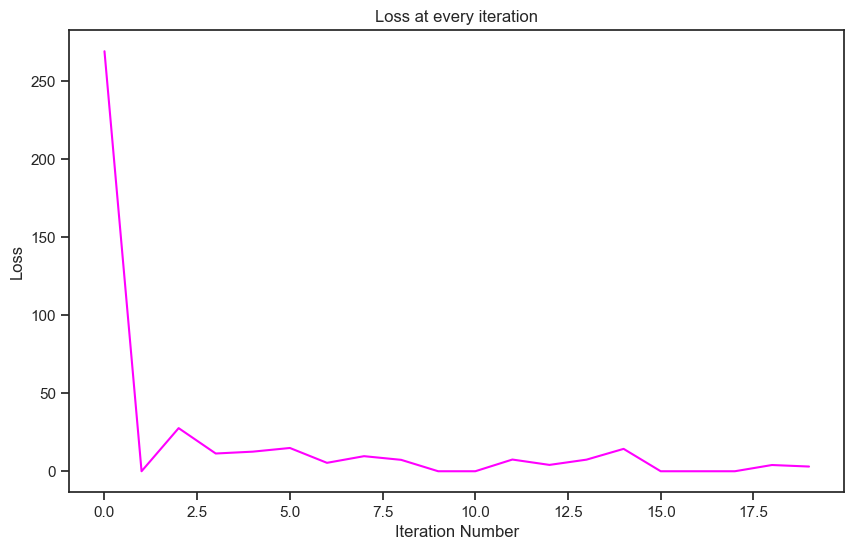

In [39]:
## Training 
human_nlp = train_spacy(human_train, 20)

In [40]:
# Save our trained model into a new directory
human_nlp.to_disk("../models/human_nlp")

Training seems to do fine. Error rate is going up for the minimum for the path we are currently walking in

Starting iteration 0
losses (iteration 0): {'ner': 503.2546773089926}
Starting iteration 1
losses (iteration 1): {'ner': 86.67355861369333}
Starting iteration 2
losses (iteration 2): {'ner': 86.636466628769}
Starting iteration 3
losses (iteration 3): {'ner': 93.04671348478857}
Starting iteration 4
losses (iteration 4): {'ner': 95.75828544438195}
Starting iteration 5
losses (iteration 5): {'ner': 90.45536212640883}
Starting iteration 6
losses (iteration 6): {'ner': 102.31681469547192}
Starting iteration 7
losses (iteration 7): {'ner': 129.4954204156566}
Starting iteration 8
losses (iteration 8): {'ner': 101.83906438930774}
Starting iteration 9
losses (iteration 9): {'ner': 68.75150855071344}
Starting iteration 10
losses (iteration 10): {'ner': 92.69110276571683}
Starting iteration 11
losses (iteration 11): {'ner': 130.05335616015637}
Starting iteration 12
losses (iteration 12): {'ner': 92.53418821053523}
Starting iteration 13
losses (iteration 13): {'ner': 126.22373675655983}
Starting i

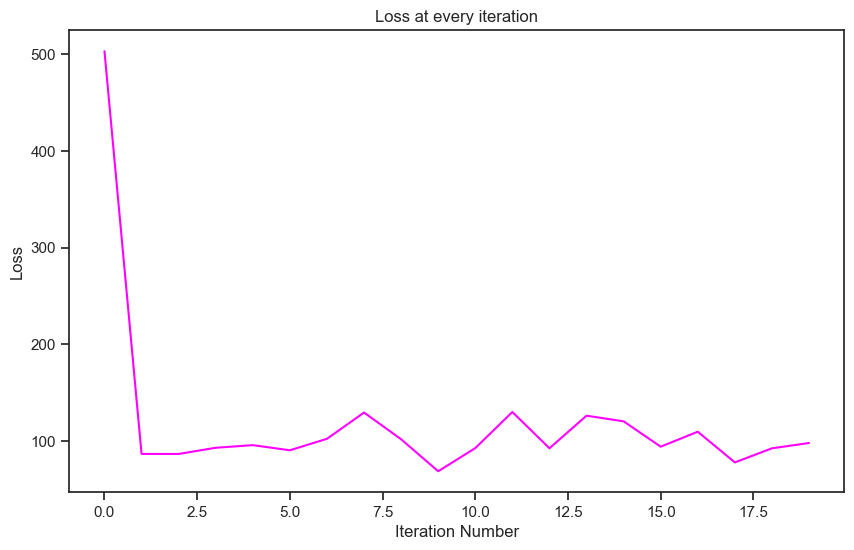

In [32]:
# Training
robot_nlp = train_spacy(robot_entity_train, 20)

# Save our trained model into a new directory
robot_nlp.to_disk('../models/robot_nlp')

Starting iteration 0
losses (iteration 0): {'ner': 397.08663887460256}
Starting iteration 1
losses (iteration 1): {'ner': 60.111321532447974}
Starting iteration 2
losses (iteration 2): {'ner': 64.94394408702416}
Starting iteration 3
losses (iteration 3): {'ner': 70.52260785539217}
Starting iteration 4
losses (iteration 4): {'ner': 44.0701069041832}
Starting iteration 5
losses (iteration 5): {'ner': 90.76685485571669}
Starting iteration 6
losses (iteration 6): {'ner': 49.05717734116633}
Starting iteration 7
losses (iteration 7): {'ner': 66.6299171154379}
Starting iteration 8
losses (iteration 8): {'ner': 68.43632043111532}
Starting iteration 9
losses (iteration 9): {'ner': 51.37343990442308}
Starting iteration 10
losses (iteration 10): {'ner': 84.13856284623415}
Starting iteration 11
losses (iteration 11): {'ner': 53.621239303559776}
Starting iteration 12
losses (iteration 12): {'ner': 67.74296990657793}
Starting iteration 13
losses (iteration 13): {'ner': 52.93129014879519}
Starting it

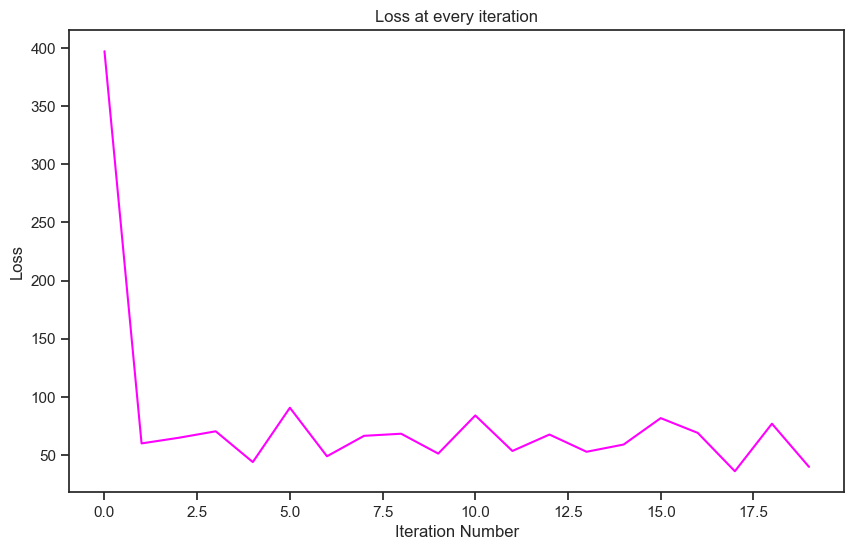

In [40]:
# Train the model 
package_nlp = train_spacy(package_entity_train, 20)
# Save the model 
package_nlp.to_disk('../models/package_nlp')

Starting iteration 0
losses (iteration 0): {'ner': 425.90894939284044}
Starting iteration 1
losses (iteration 1): {'ner': 101.67446827836527}
Starting iteration 2
losses (iteration 2): {'ner': 79.61794294465003}
Starting iteration 3
losses (iteration 3): {'ner': 88.78547336171027}
Starting iteration 4
losses (iteration 4): {'ner': 52.6406690667702}
Starting iteration 5
losses (iteration 5): {'ner': 109.03699625867809}
Starting iteration 6
losses (iteration 6): {'ner': 67.39902388467483}
Starting iteration 7
losses (iteration 7): {'ner': 102.44477910428145}
Starting iteration 8
losses (iteration 8): {'ner': 87.2940460162384}
Starting iteration 9
losses (iteration 9): {'ner': 95.69093026993215}
Starting iteration 10
losses (iteration 10): {'ner': 76.29276002824177}
Starting iteration 11
losses (iteration 11): {'ner': 81.98274429821352}
Starting iteration 12
losses (iteration 12): {'ner': 90.99315259263358}
Starting iteration 13
losses (iteration 13): {'ner': 69.65904969308968}
Starting i

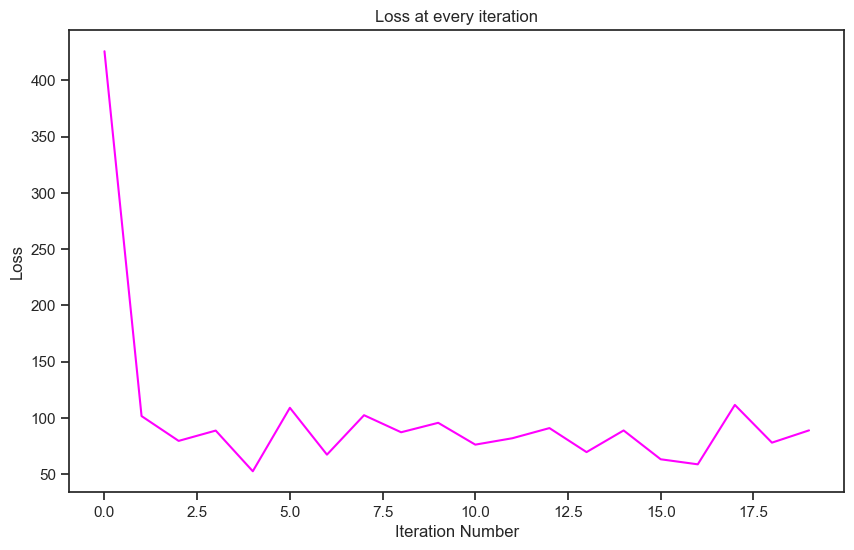

In [73]:
# Training
discount_nlp = train_spacy(discount_entity_train, 20)

# Save our trained model into a new directory
discount_nlp.to_disk('../models/discount_nlp')

**Observations** 
- From all of this, I can understand one thing: go out, is it learning noise??? Is it just learning noise OR just too much beyond a certain point? 
- Or maybe once the loss has decrease to a certain extent, since I am using SGD, this could happen...its possible...

Starting iteration 0
losses (iteration 0): {'ner': 518.3280994746206}
Starting iteration 1
losses (iteration 1): {'ner': 176.75143629978993}
Starting iteration 2
losses (iteration 2): {'ner': 175.60305699708138}
Starting iteration 3
losses (iteration 3): {'ner': 158.9790536518383}
Starting iteration 4
losses (iteration 4): {'ner': 180.20436406714714}
Starting iteration 5
losses (iteration 5): {'ner': 218.6117716638006}
Starting iteration 6
losses (iteration 6): {'ner': 171.5774975244457}
Starting iteration 7
losses (iteration 7): {'ner': 165.7315354114736}
Starting iteration 8
losses (iteration 8): {'ner': 186.36097528971726}
Starting iteration 9
losses (iteration 9): {'ner': 146.93672526226774}
Starting iteration 10
losses (iteration 10): {'ner': 148.00508706748494}
Starting iteration 11
losses (iteration 11): {'ner': 175.0487212526455}
Starting iteration 12
losses (iteration 12): {'ner': 171.2180669258779}
Starting iteration 13
losses (iteration 13): {'ner': 137.71432736616936}
Start

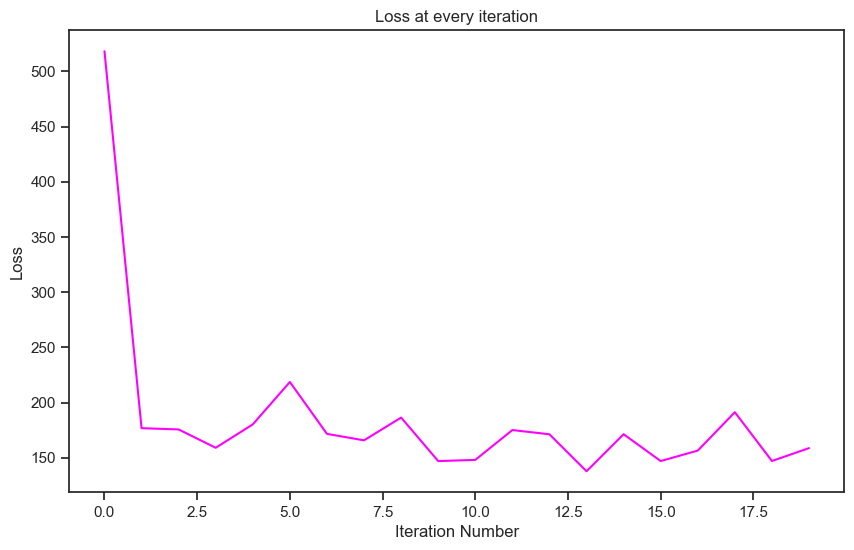

In [79]:
# Training 
greet_nlp = train_spacy(greet_entity_train, 20)

# Save the model
greet_nlp.to_disk('../models/greet_nlp')

In [101]:
# Load all models 
human_nlp = spacy.load('../models/human_nlp')
robot_nlp = spacy.load('../models/robot_nlp')
package_nlp = spacy.load('../models/package_nlp')
discount_nlp = spacy.load('../models/discount_nlp')
greet_nlp = spacy.load('../models/greet_nlp')

In [102]:
# Serializing
pickle.dump(human_nlp, open('../models/human_big_nlp.pkl', "wb"))
pickle.dump(robot_nlp, open('../models/robot_big_nlp.pkl', "wb"))
pickle.dump(package_nlp, open('../models/package_big_nlp.pkl', "wb"))
pickle.dump(discount_nlp, open('../models/discount_big_nlp.pkl', "wb"))
pickle.dump(greet_nlp, open('../models/greet_big_nlp.pkl', "wb"))

## Test the model out 

In [35]:
entity_dict_non_span.keys()

dict_keys(['GREET', 'ROBOT_AI', 'HUMAN', 'PACKAGE', 'DISCOUNT'])

In [36]:
# Testing out the results 
def extract_entities(user_input, entity_name, visualize=False):
    # Load the model 
    if entity_name == "HUMAN":
        model_path = "../models/human_big_nlp.pkl"

    elif entity_name == "ROBOT_AI":
        model_path = "../models/robot_big_nlp.pkl"

    elif entity_name == 'PACKAGE':
        model_path = "../models/package_big_nlp.pkl"

    elif entity_name == 'DISCOUNT':
        model_path = "../models/discount_big_nlp.pkl"

    else: 
        model_path = "../models/greet_big_nlp.pkl"
        
    model_name = pickle.load(open(model_path, 'rb'))
    doc = model_name(user_input)
    
    extracted_entities = []
    
    # These are the entities that we are interested in
    for ent in doc.ents: 
        extracted_entities.append((ent.text, ent.start_char, ent.end_char, ent.label_))
        
    # If visualization is required, which definitely is 
    if visualize: 
        # Visualize with displacy how the document had it's entity tagged (runs a server)
        colors = {f"{entity_name}": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
        options = {"ents": [f"{entity_name}"], "colors": colors}
        html = displacy.render(doc, style = 'ent', options = options)
        display(HTML(html))

    return extracted_entities

In [39]:
# Test human model 
test_text = '''I talked to the Amazon representative earlier in the day but no one responded. The operator isn't human I guess. 
            The chat ended soon and the support was just awful. I love California. And I love people'''
            
extract_entities(test_text, "HUMAN", visualize=True)

<IPython.core.display.HTML object>

[('representative', 23, 37, 'HUMAN'),
 ('operator', 83, 91, 'HUMAN'),
 ('human', 98, 103, 'HUMAN'),
 ('chat', 130, 134, 'HUMAN'),
 ('support', 154, 161, 'HUMAN')]

In [34]:
entity_dict_non_span["ROBOT_AI"]

['bot',
 'real',
 'ai',
 'computer',
 'robot',
 'machine',
 'system',
 'chatbot',
 'software',
 'assistant',
 'automated',
 'agent',
 'computerized',
 'virtual']

In [40]:
# Test the robot model
test_text = '''Is it a bot ? I thought I have been talking to a fellow human being. The AI system is so freaking good!!!'''
extract_entities(test_text, "ROBOT_AI", visualize=True)

<IPython.core.display.HTML object>

[('bot', 8, 11, 'ROBOT_AI'),
 ('AI', 73, 75, 'ROBOT_AI'),
 ('system', 76, 82, 'ROBOT_AI')]

In [42]:
entity_dict_non_span["PACKAGE"]

['package', 'parcel', 'shipment', 'delivery']

In [41]:
# Test the package model
test_text = '''I am waiting for my package to arrive. I hope it arrives soon. The delivery is taking too long'''
extract_entities(test_text, "PACKAGE", visualize=True)

<IPython.core.display.HTML object>

[('package', 20, 27, 'PACKAGE'), ('delivery', 67, 75, 'PACKAGE')]

In [44]:
entity_dict_non_span["DISCOUNT"]

['offer',
 'discount',
 'promo',
 'promotion',
 'sale',
 'deal',
 'coupon',
 'voucher',
 'code']

In [47]:
# Test the discount model
test_text = '''Discount is happening right now. The promo is available. The sale is on. The deal is great.'''
extract_entities(test_text, "DISCOUNT", visualize=True)

<IPython.core.display.HTML object>

[('Discount', 0, 8, 'DISCOUNT'),
 ('promo', 37, 42, 'DISCOUNT'),
 ('sale', 61, 65, 'DISCOUNT'),
 ('deal', 77, 81, 'DISCOUNT')]

In [53]:
test_text = '''Hi there!!! How have you been today???'''
extract_entities(test_text, "GREET", visualize=True)

<IPython.core.display.HTML object>

[('Hi', 0, 2, 'GREET')]